<a href="https://colab.research.google.com/github/ajayjakkampudi/Sentiment-Analysis/blob/training/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Loading Pickle Model

In [ ]:
import pickle
df=pickle.load(open('/content/drive/MyDrive/Projects/twitter dataset/preprocessed_model.pkl','rb'))
df.head()

,target,text
0,0,upset can't update facebook texting might cry ...
1,0,dived many time ball managed save rest go bound
2,0,whole body feel itchy like fire
3,0,no not behaving i'm mad can't see
4,0,not whole crew


In [ ]:
df.target=df['target'].replace(4,1)
df.tail()

,target,text
1599995,1,thewdb com cool hear old walt interview bmta
1599996,1,ready mojo makeover ask detail
1599997,1,happy th birthday boo alll time tupac amaru sh...
1599998,1,happy #charitytuesday h
1599999,0,awww that's bummer shoulda got david carr thir...


In [ ]:
df.drop(index=[1599999],axis=0,inplace=True)

In [ ]:
df.target.value_counts()

1    800000
0    799999
Name: target, dtype: int64

In [ ]:
df.target=df.target.astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   text    1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [ ]:
X,y=[df.text,df.target]

### Splitting the dataset

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
y_train.value_counts()

0    560223
1    559776
Name: target, dtype: int64

Splited data are balanced

In [ ]:
vectoriser=TfidfVectorizer()
vectoriser.fit(X_train)
X_train=vectoriser.transform(X_train)
X_test=vectoriser.transform(X_test)

In [ ]:
X_train

<1119999x212534 sparse matrix of type '<class 'numpy.float64'>'
	with 7867411 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<480000x212534 sparse matrix of type '<class 'numpy.float64'>'
	with 3312964 stored elements in Compressed Sparse Row format>

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

### Model Evaluation

In [ ]:
def model_evaluate(model):
    y_pred = model.predict(X_test) 
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(conf_matrix)
    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos'] #configuration of a confusin matrix
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)] #converting confusion matrix value to percentage in 2 decimal places.

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sb.heatmap(conf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(X_train, y_train)


LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

           0       0.80      0.77      0.78    239776
           1       0.78      0.80      0.79    240224

    accuracy                           0.79    480000
   macro avg       0.79      0.79      0.79    480000
weighted avg       0.79      0.79      0.79    480000

[[185228  54548]
 [ 47000 193224]]


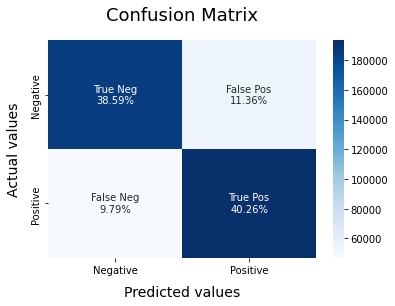

In [ ]:
model_evaluate(lr)

### Saving the model

In [ ]:
import pickle as pkl

In [ ]:
# Vectoriser
file=open('/content/drive/MyDrive/Projects/twitter dataset/vectoriser-Tf-Idf.pkl','wb')
pkl.dump(vectoriser,file)
file.close()

# Logistic Regression
file=open('/content/drive/MyDrive/Projects/twitter dataset/sentiment-logistic regression.pkl','wb')
pkl.dump(lr,file)
file.close()

Text Preproccessing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re

In [ ]:
stop_words=stopwords.words('english')

In [ ]:
removing_words=['aren','no','nor','not','ain',"aren't",'don',"don't",'couldn',"couldn't",'didn',"didn't",
                'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',
                "mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",
                'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

for i in range(0,len(removing_words)):
       if removing_words[i] in stop_words:
           stop_words.remove(removing_words[i])

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def text_preproccessing(text):
  preproccessed_tweet=[]
  for tweet in text:
    tweet=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',tweet)
    tweet=re.sub('@[a-zA-Z]+','',tweet)
    tweet=re.sub("[^#a-zA-Z']+",' ',tweet)
    tweet=tweet.lower()
    tweet=' '.join([WordNetLemmatizer().lemmatize(word) for word in tweet.split() if word not in stop_words])
    preproccessed_tweet.append(tweet)
  return preproccessed_tweet
  

### Using the model

In [ ]:
import pandas as pd
def load_model():
  # Load the vectoriser.
  file=open('/content/drive/MyDrive/Projects/twitter dataset/vectoriser-Tf-Idf.pkl','rb')
  vectoriser=pickle.load(file)
  file.close()


  # Load the LR Model.
  file=open('/content/drive/MyDrive/Projects/twitter dataset/sentiment-logistic regression.pkl','rb')
  lrmodel=pickle.load(file)
  file.close()

  return vectoriser,lrmodel

def predict(text,vectoriser,model):
  vector=vectoriser.transform(text_preproccessing(text))
  prediction=model.predict(vector)
  data=[]
  for texts,sentiment in zip(text,prediction):
    data.append((texts,sentiment))
  dataframe=pd.DataFrame(data,columns={'Text','Sentiment Anlaysis'})
  dataframe['Sentiment Anlaysis']=dataframe['Sentiment Anlaysis'].replace([0,1],["Negative","Positive"])
  return dataframe



In [ ]:
if __name__=="__main__":
  text = ["Good morning,everyone"]
           
    
  df=predict(text,vectoriser,lr)
  print(df)


                    Text Sentiment Anlaysis
0  Good morning,everyone           Positive
